In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
import numpy as np

$$ P(X|\lambda) = \sum_{k=1}^{K} \pi_k \mathcal{N}(X|\mu_k, \Sigma_k) $$

X is the data, λ represents the parameters of the model, π_k are the mixture weights, and $\mathcal{N}(X|\mu_k, \Sigma_k)$ is the Gaussian distribution for component k.

In [46]:
def plot_cov_ellipse(cov, pos, nstd=2, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    v, w = np.linalg.eigh(cov)
    v = np.maximum(v, 0)
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.degrees(np.arctan2(u[1], u[0]))
    ell = Ellipse(xy=pos, width=v[0]*nstd, height=v[1]*nstd, angle=angle, **kwargs)
    ell.set_facecolor('none')
    ax.add_patch(ell)

In [3]:
def load_data(dataset_path):
    data = pd.read_csv("Datasets/"+ dataset_path)
    y_true = data['class']
    data = data.drop('class', axis=1)
    return data, y_true

In [4]:
def normalization(data):
    demean = data - data.mean()
    unit_variance = demean / data.std()
    return unit_variance

In [26]:
data, y_true = load_data("dartboard2.csv")

In [27]:
n_components = 15
gmm = GaussianMixture(n_components=n_components)
gmm.fit(data)
y_pred = gmm.predict(data)
means = gmm.means_
covariances = gmm.covariances_
weights = gmm.weights_

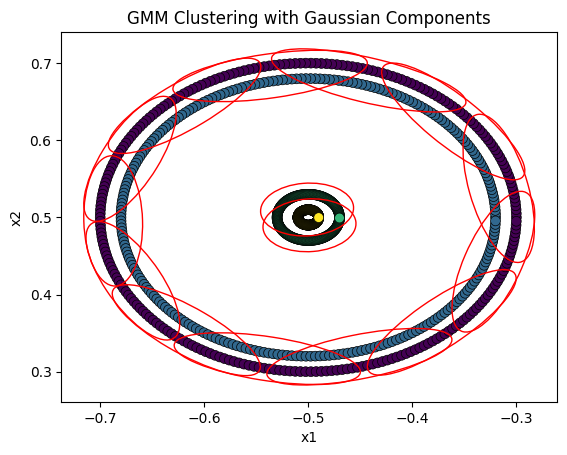

In [28]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_true, cmap='viridis', s=50, edgecolors='k', linewidth=0.5)

for i in range(n_components):
    plot_cov_ellipse(covariances[i], means[i], nstd=2, ax=plt.gca(), edgecolor='red')

plt.title('GMM Clustering with Gaussian Components')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [9]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score

ari = adjusted_rand_score(y_true, y_pred)
nmi = normalized_mutual_info_score(y_true, y_pred)
fmi = fowlkes_mallows_score(y_true, y_pred)

print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Normalized Mutual Information: {nmi:.4f}")
print(f"Fowlkes-Mallows Index: {fmi:.4f}")
#BIC AIC

Adjusted Rand Index: 0.0764
Normalized Mutual Information: 0.3068
Fowlkes-Mallows Index: 0.3987


In [11]:
from Model import GaussianMixtureModel
def GMM(data, n_components):
    model = GaussianMixtureModel(n_components)
    X = np.array(data)
    model.fit(X)
    predicted_labels = model.predict(X)
    means = model.means
    covariances = model.covariances
    return means, covariances
    
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_true, cmap='viridis', s=50, edgecolors='k', linewidth=0.5)

    for i in range(n_components):
        plot_cov_ellipse(covariances[i], means[i], nstd=2, ax=plt.gca(), edgecolor='red')

    plt.title('GMM Clustering with Gaussian Components')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

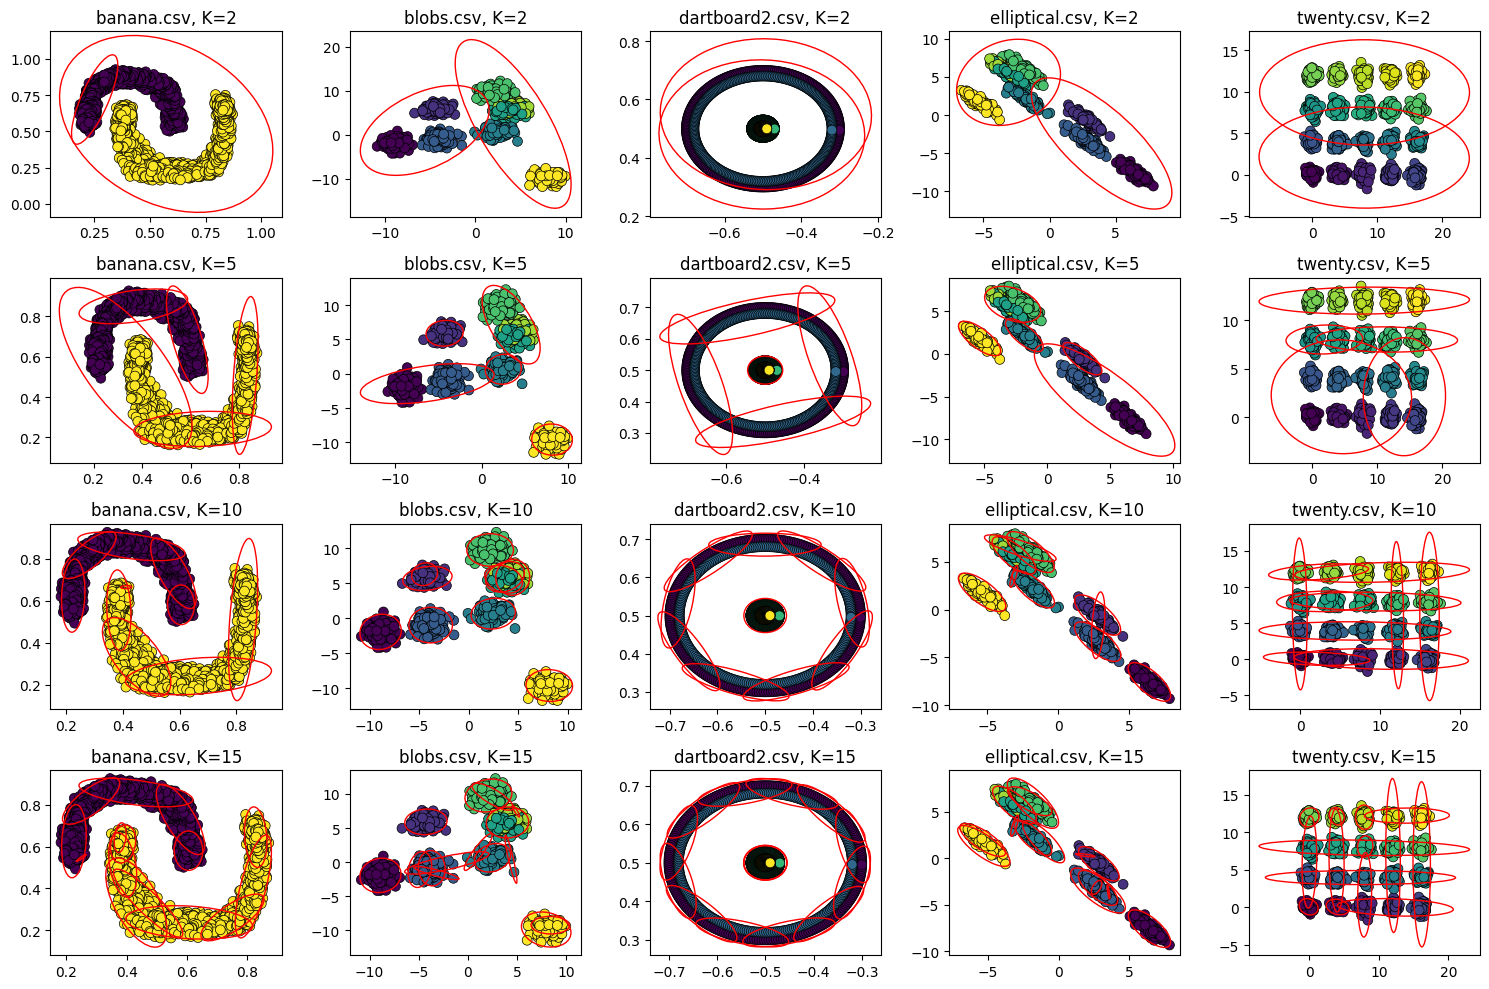

In [48]:
datasets_path = ['banana.csv','blobs.csv','dartboard2.csv','elliptical.csv','twenty.csv']
datasets = []
metrics = []
for dataset_path in datasets_path:
    data, labels = load_data(dataset_path)
    metrics.append((data.mean(),data.std()))
    data = normalization(data)
    datasets.append((data,labels))
    
k_values = [2, 5, 10, 15]

fig, axs = plt.subplots(len(k_values), len(datasets), figsize=(15, 10))
for i, k in enumerate(k_values):
    for j, (dataset, labels) in enumerate(datasets):
        means, covariances = GMM(dataset, k)
        mean = metrics[j][0]
        std = metrics[j][1]
        transformed_means = (means * np.array(std)) + np.array(mean)
        transformed_covariances = covariances * (np.array(std)**2)
        data_1 = dataset * std        
        data = data_1 + mean
        axs[i, j].scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis', s=50, edgecolors='k', linewidth=0.5)
        for m in range(k):
            plot_cov_ellipse(transformed_covariances[m], transformed_means[m], nstd=2, ax=axs[i, j], edgecolor='red')
        axs[i, j].set_title(f'{datasets_path[j]}, K={k}')

plt.tight_layout()
plt.show()
